In [1]:
# 1. Data Source and Contents
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
census_data = pd.read_csv('census_data.csv')

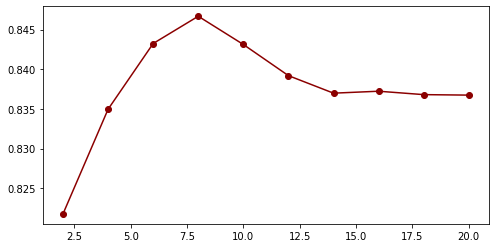

In [21]:
# 2. Finding Optimal Value of Key Hyperparameter
from sklearn import preprocessing
census_data_train = census_data[census_data['flag'] == 'train']
census_data_test = census_data[census_data['flag'] == 'test']
label_encoder = preprocessing.LabelEncoder() # used to encode data
train = census_data_train.apply(label_encoder.fit_transform)
test = census_data_test.apply(label_encoder.fit_transform)

# Create variables
features = ['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin', 'age_bin']
x_train = train[features]
y_train = train.y
x_test = test[features]
y_test = test.y

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 10, random_state = 101, max_features = None, min_samples_leaf = 15)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]

for trees in max_depth_options:
  model = DecisionTreeClassifier(max_depth=trees, random_state=101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred", marker="o")


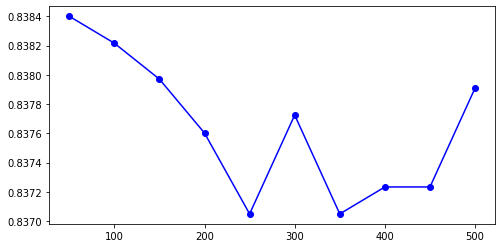

In [30]:
# 3. Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimators:
  rf_model = RandomForestClassifier(n_estimators = trees, random_state = 101)
  rf_model.fit(x_train, y_train)
  y_pred_rf = rf_model.predict(x_test)
  rf_accuracy = np.mean(y_test == y_pred_rf)
  rf_results.append(rf_accuracy)

plt.figure(figsize = (8,4))
pd.Series(rf_results, n_estimators).plot(color = "blue", marker = "o")

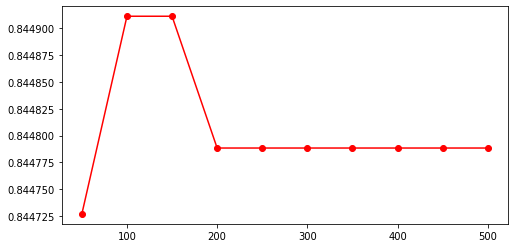

In [31]:
# 4. Building AdaBoost, Gradient Boost (classifier) and XGB Model
# AdaBoost Model
from sklearn.ensemble import AdaBoostClassifier
ab_results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimators:
  ab_model = AdaBoostClassifier(n_estimators = trees, random_state = 101)
  ab_model.fit(x_train, y_train)
  y_pred_ab = ab_model.predict(x_test)
  ab_accuracy = np.mean(y_test == y_pred_ab)
  ab_results.append(ab_accuracy)

plt.figure(figsize = (8,4))
pd.Series(ab_results, n_estimators).plot(color = "red", marker = "o")

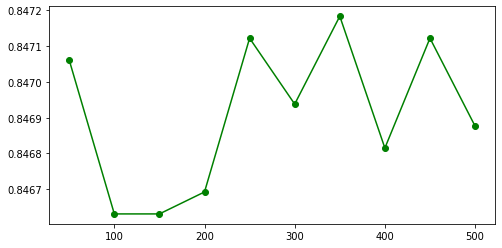

In [33]:
# Gradient Boost Model
from sklearn.ensemble import GradientBoostingClassifier
gb_results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimators:
  gb_model = GradientBoostingClassifier(n_estimators = trees, random_state = 101)
  gb_model.fit(x_train, y_train)
  y_pred_gb = gb_model.predict(x_test)
  gb_accuracy = np.mean(y_test == y_pred_gb)
  gb_results.append(gb_accuracy)

plt.figure(figsize = (8,4))
pd.Series(gb_results, n_estimators).plot(color = "green", marker = "o")

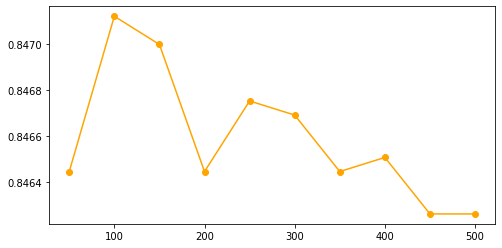

In [34]:
# XGB Model
from xgboost import XGBClassifier
xgb_results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator_values:
  xgb_model = XGBClassifier(n_estimators = trees, random_state = 101)
  xgb_model.fit(x_train, y_train)
  y_pred_xgb = xgb_model.predict(x_test)
  xgb_accuracy = np.mean(y_test == y_pred_xgb)
  xgb_results.append(xgb_accuracy)

plt.figure(figsize = (8,4))
pd.Series(xgb_results, n_estimators).plot(color = "orange", marker = "o")

In [35]:
# 5. Compare Performance
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
comparison = pd.DataFrame(index = ['Accuracy', 'AUC'], columns = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'XGB'])
# create list to append accuracy scores
accuracy = []
accuracy.append(rf_accuracy)
accuracy.append(ab_accuracy)
accuracy.append(gb_accuracy)
accuracy.append(xgb_accuracy)
accuracy
# create list to append AUC scores
auc = []
auc.append(roc_auc_score(y_test, y_pred_rf))
auc.append(roc_auc_score(y_test, y_pred_ab))
auc.append(roc_auc_score(y_test, y_pred_gb))
auc.append(roc_auc_score(y_test, y_pred_xgb))
auc

comparison.loc['Accuracy'] = accuracy
comparison.loc['AUC'] = auc
comparison

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.837909,0.844788,0.846877,0.846263
AUC,0.746533,0.746008,0.760934,0.759185
